In [ ]:
import numpy as np 
import pandas as pd 
import datetime as dt 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


In [ ]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding="latin1")

<ipython-input-5-beb2b1acc522>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding="latin1")


In [ ]:
df = df[['iyear', 'imonth', 'iday', 'extended', 'country', 'provstate', 'country_txt', 'success', 'attacktype1_txt', 'targtype1_txt', 'gname',
         'weaptype1_txt']]
df.head()

,iyear,imonth,iday,extended,country,provstate,country_txt,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt
0,1970,7,2,0,58,NaN,Dominican Republic,1,Assassination,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,130,Federal,Mexico,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,160,Tarlac,Philippines,1,Assassination,Journalists & Media,Unknown,Unknown
3,1970,1,0,0,78,Attica,Greece,1,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives
4,1970,1,0,0,101,Fukouka,Japan,1,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary


In [ ]:
start_year = 2000
country = 'United States'
df = df.loc[(df['iyear'] >= start_year) & (df['country_txt'] == country)]
df.head()

,iyear,imonth,iday,extended,country,provstate,country_txt,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt
69861,2000,1,1,0,217,Michigan,United States,1,Facility/Infrastructure Attack,Business,Earth Liberation Front (ELF),Incendiary
69873,2000,1,3,0,217,California,United States,1,Facility/Infrastructure Attack,Business,Animal Liberation Front (ALF),Incendiary
69874,2000,1,3,0,217,Ohio,United States,0,Bombing/Explosion,Abortion Related,Anti-Abortion extremists,Explosives
69875,2000,1,3,0,217,Ohio,United States,0,Bombing/Explosion,Abortion Related,Anti-Abortion extremists,Explosives
69942,2000,1,15,0,217,California,United States,1,Facility/Infrastructure Attack,Business,Animal Liberation Front (ALF),Incendiary


In [ ]:
count = df['gname'].value_counts()
count.head(21)

Unknown                                  149
Earth Liberation Front (ELF)              58
Animal Liberation Front (ALF)             37
Anti-Government extremists                32
Jihadi-inspired extremists                30
Anti-Muslim extremists                    26
Anti-Abortion extremists                  23
White extremists                          18
Muslim extremists                         13
Coalition to Save the Preserves (CSP)      8
Anti-Police extremists                     7
Anti-White extremists                      6
Anti-Semitic extremists                    6
Al-Qaida                                   4
Environmentalists                          4
Ku Klux Klan                               4
Anti-LGBT extremists                       4
Sovereign Citizen                          4
Black Hebrew Israelites                    3
Neo-Nazi extremists                        3
Incel extremists                           3
Name: gname, dtype: int64

In [ ]:
num_names = 20
names = count.keys()[1:num_names+1]
names = list(names)
names

['Earth Liberation Front (ELF)',
 'Animal Liberation Front (ALF)',
 'Anti-Government extremists',
 'Jihadi-inspired extremists',
 'Anti-Muslim extremists',
 'Anti-Abortion extremists',
 'White extremists',
 'Muslim extremists',
 'Coalition to Save the Preserves (CSP)',
 'Anti-Police extremists',
 'Anti-White extremists',
 'Anti-Semitic extremists',
 'Al-Qaida',
 'Environmentalists',
 'Ku Klux Klan',
 'Anti-LGBT extremists',
 'Sovereign Citizen',
 'Black Hebrew Israelites',
 'Neo-Nazi extremists',
 'Incel extremists']

In [ ]:
countries = pd.get_dummies(df['country_txt'])
countries.reset_index(drop = True, inplace = True)

states = pd.get_dummies(df['provstate'])
states.reset_index(drop = True, inplace = True)

attacks = pd.get_dummies(df['attacktype1_txt'])
attacks.reset_index(drop = True, inplace = True)

targets = pd.get_dummies(df['targtype1_txt'])
targets.reset_index(drop = True, inplace = True)

weapons = pd.get_dummies(df['weaptype1_txt'])
weapons.reset_index(drop = True, inplace = True)

In [ ]:
df.reset_index(drop=True, inplace=True)
df_dummies = pd.concat([df, countries, states, attacks, targets, weapons], axis = 1)

In [ ]:
df_dummies = df_dummies.drop(['country','imonth', 'iday', 'country_txt',
                              'provstate', 'attacktype1_txt','targtype1_txt',
                              'weaptype1_txt'],
                             axis = 1)
df_dummies.head()

,iyear,extended,success,gname,United States,Alabama,Arizona,Arkansas,California,Colorado,...,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Sabotage Equipment,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
0,2000,0,1,Earth Liberation Front (ELF),1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2000,0,1,Animal Liberation Front (ALF),1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2000,0,0,Anti-Abortion extremists,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2000,0,0,Anti-Abortion extremists,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2000,0,1,Animal Liberation Front (ALF),1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
unknown = df[df['gname'] == 'Unknown']
unknown.head()

,iyear,imonth,iday,extended,country,provstate,country_txt,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt
9,2000,3,22,0,217,Utah,United States,1,Unarmed Assault,Government (General),Unknown,Chemical
10,2000,3,25,0,217,Arizona,United States,1,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives
11,2000,4,3,0,217,Missouri,United States,1,Unarmed Assault,Government (General),Unknown,Chemical
19,2000,7,19,0,217,Wisconsin,United States,0,Bombing/Explosion,Military,Unknown,Explosives
43,2001,5,5,0,217,Texas,United States,1,Facility/Infrastructure Attack,Business,Unknown,Incendiary


In [ ]:
df_dummies = df_dummies.loc[(df_dummies['gname'] != 'Unknown') & (df_dummies['gname'].isin(names))]
df_dummies.head()

,iyear,extended,success,gname,United States,Alabama,Arizona,Arkansas,California,Colorado,...,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Sabotage Equipment,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
0,2000,0,1,Earth Liberation Front (ELF),1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2000,0,1,Animal Liberation Front (ALF),1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2000,0,0,Anti-Abortion extremists,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2000,0,0,Anti-Abortion extremists,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2000,0,1,Animal Liberation Front (ALF),1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
x=df_dummies.loc[:,~df_dummies.columns.isin(['gname'])].values
y=df_dummies.loc[:,'gname'].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(205, 85)
(88, 85)
(205,)
(88,)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

import time
import warnings
warnings.filterwarnings('ignore')

ImportError: ignored

# KNeighbors Classifier

In [ ]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors':[5,10,15,25,30,50], 'weights': ['uniform','distance']}

grid_knn = GridSearchCV(knn,param_grid,scoring='accuracy',cv = 10,refit = True)

In [ ]:
start_time = time.time()

grid_knn.fit(x_train_std,y_train)
print("Best Score ==> ", grid_knn.best_score_)
print("Tuned Paramerers ==> ", grid_knn.best_params_)
print("Accuracy on Train set ==> ", grid_knn.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_knn.score(x_test_std,y_test))

end_time = time.time()
run_time = end_time - start_time
print('Runtime of the Grid Search for the KNeighbors Algorithm: {:.5f}s'.format(run_time))

Best Score ==>  0.5226190476190476
Tuned Paramerers ==>  {'n_neighbors': 10, 'weights': 'distance'}
Accuracy on Train set ==>  0.9804878048780488
Accuracy on Test set ==>  0.5113636363636364
Runtime of the Grid Search for the KNeighbors Algorithm: 0.44669s


In [ ]:
start_time = time.time()

knn = KNeighborsClassifier(**grid_knn.best_params_)
knn.fit(x_train_std, y_train)

print("Accuracy on Train set ==> ", knn.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", knn.score(x_test_std,y_test))

end_time = time.time()
kn_run_time = end_time - start_time

print('Runtime of the KNeighbors Classifier Algorithm: {:.5f}s'.format(kn_run_time))

Accuracy on Train set ==>  0.9804878048780488
Accuracy on Test set ==>  0.5113636363636364
Runtime of the KNeighbors Classifier Algorithm: 0.02766s


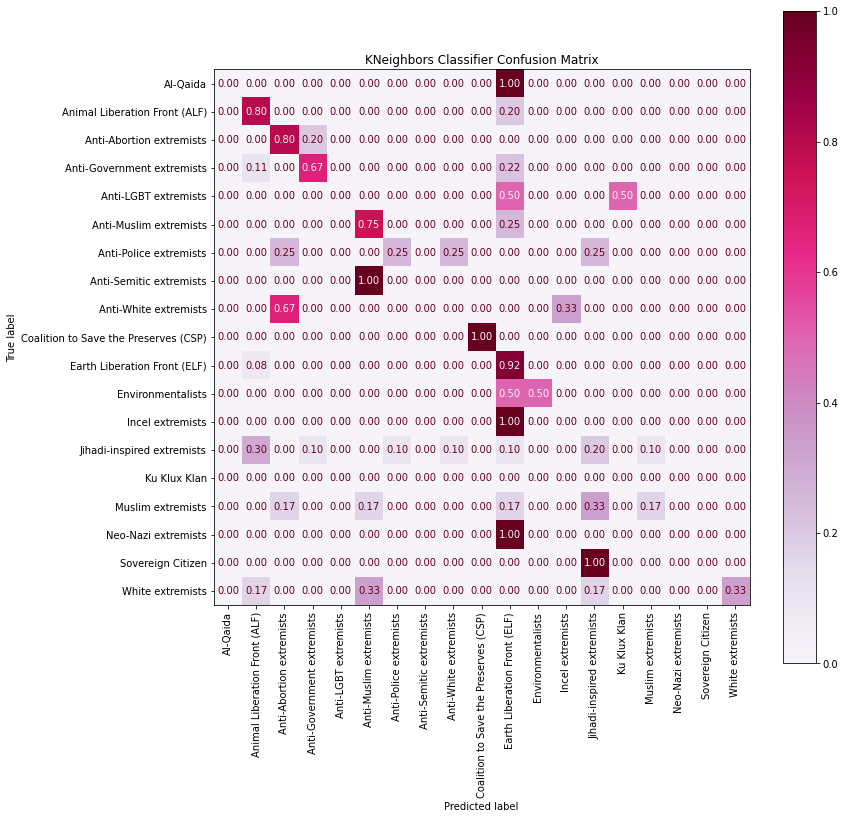

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))

matrix = plot_confusion_matrix(knn, x_test_std, y_test, ax=ax, xticks_rotation='vertical',
                               cmap='PuRd', normalize='true', values_format='.2f')
plt.title('KNeighbors Classifier Confusion Matrix')
plt.show()

In [ ]:
knn_acc=print("Accuracy on Test set using KNeighbors: {:.4%}".format(knn.score(x_test_std,y_test)))
knn_rt=print('Runtime of the KNeighbors Classifier Algorithm: {:.4f}s'.format(kn_run_time))

Accuracy on Test set using KNeighbors: 51.1364%
Runtime of the KNeighbors Classifier Algorithm: 0.0277s


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],'min_samples_leaf':[1, 2, 3, 4, 5, 10, 25, 50],'max_depth':np.arange(2, 10)}

grid_dtc = GridSearchCV(dtc,param_grid,scoring='accuracy',cv = 10,refit = True)

In [ ]:
start_time = time.time()

grid_dtc.fit(x_train, y_train)
print("Best Score ==> ", grid_dtc.best_score_)
print("Tuned Paramerers ==> ", grid_dtc.best_params_)
print("Accuracy on Train set ==> ", grid_dtc.score(x_train,y_train))
print("Accuracy on Test set ==> ", grid_dtc.score(x_test,y_test))

end_time = time.time()
run_time = end_time - start_time
print('Runtime of the Grid Search for the Decision Tree Algorithm: {:.5f}s'.format(run_time))

Best Score ==>  0.6102380952380952
Tuned Paramerers ==>  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1}
Accuracy on Train set ==>  0.9170731707317074
Accuracy on Test set ==>  0.5454545454545454
Runtime of the Grid Search for the Decision Tree Algorithm: 2.33806s


In [ ]:
start_time = time.time()

dtc = DecisionTreeClassifier(**grid_dtc.best_params_, random_state=42)
dtc.fit(x_train, y_train)

print("Accuracy on Train set ==> ", dtc.score(x_train,y_train))
print("Accuracy on Test set ==> ", dtc.score(x_test,y_test))

end_time = time.time()
dtc_run_time = end_time - start_time

print('Runtime of the Decision Tree Classifier Algorithm: {:.5f}s'.format(dtc_run_time))

Accuracy on Train set ==>  0.9170731707317074
Accuracy on Test set ==>  0.5340909090909091
Runtime of the Decision Tree Classifier Algorithm: 0.00853s


In [ ]:
features = df_dummies.loc[:,~df_dummies.columns.isin(['gname'])].columns
classes = df_dummies['gname'].unique()
classes.sort()

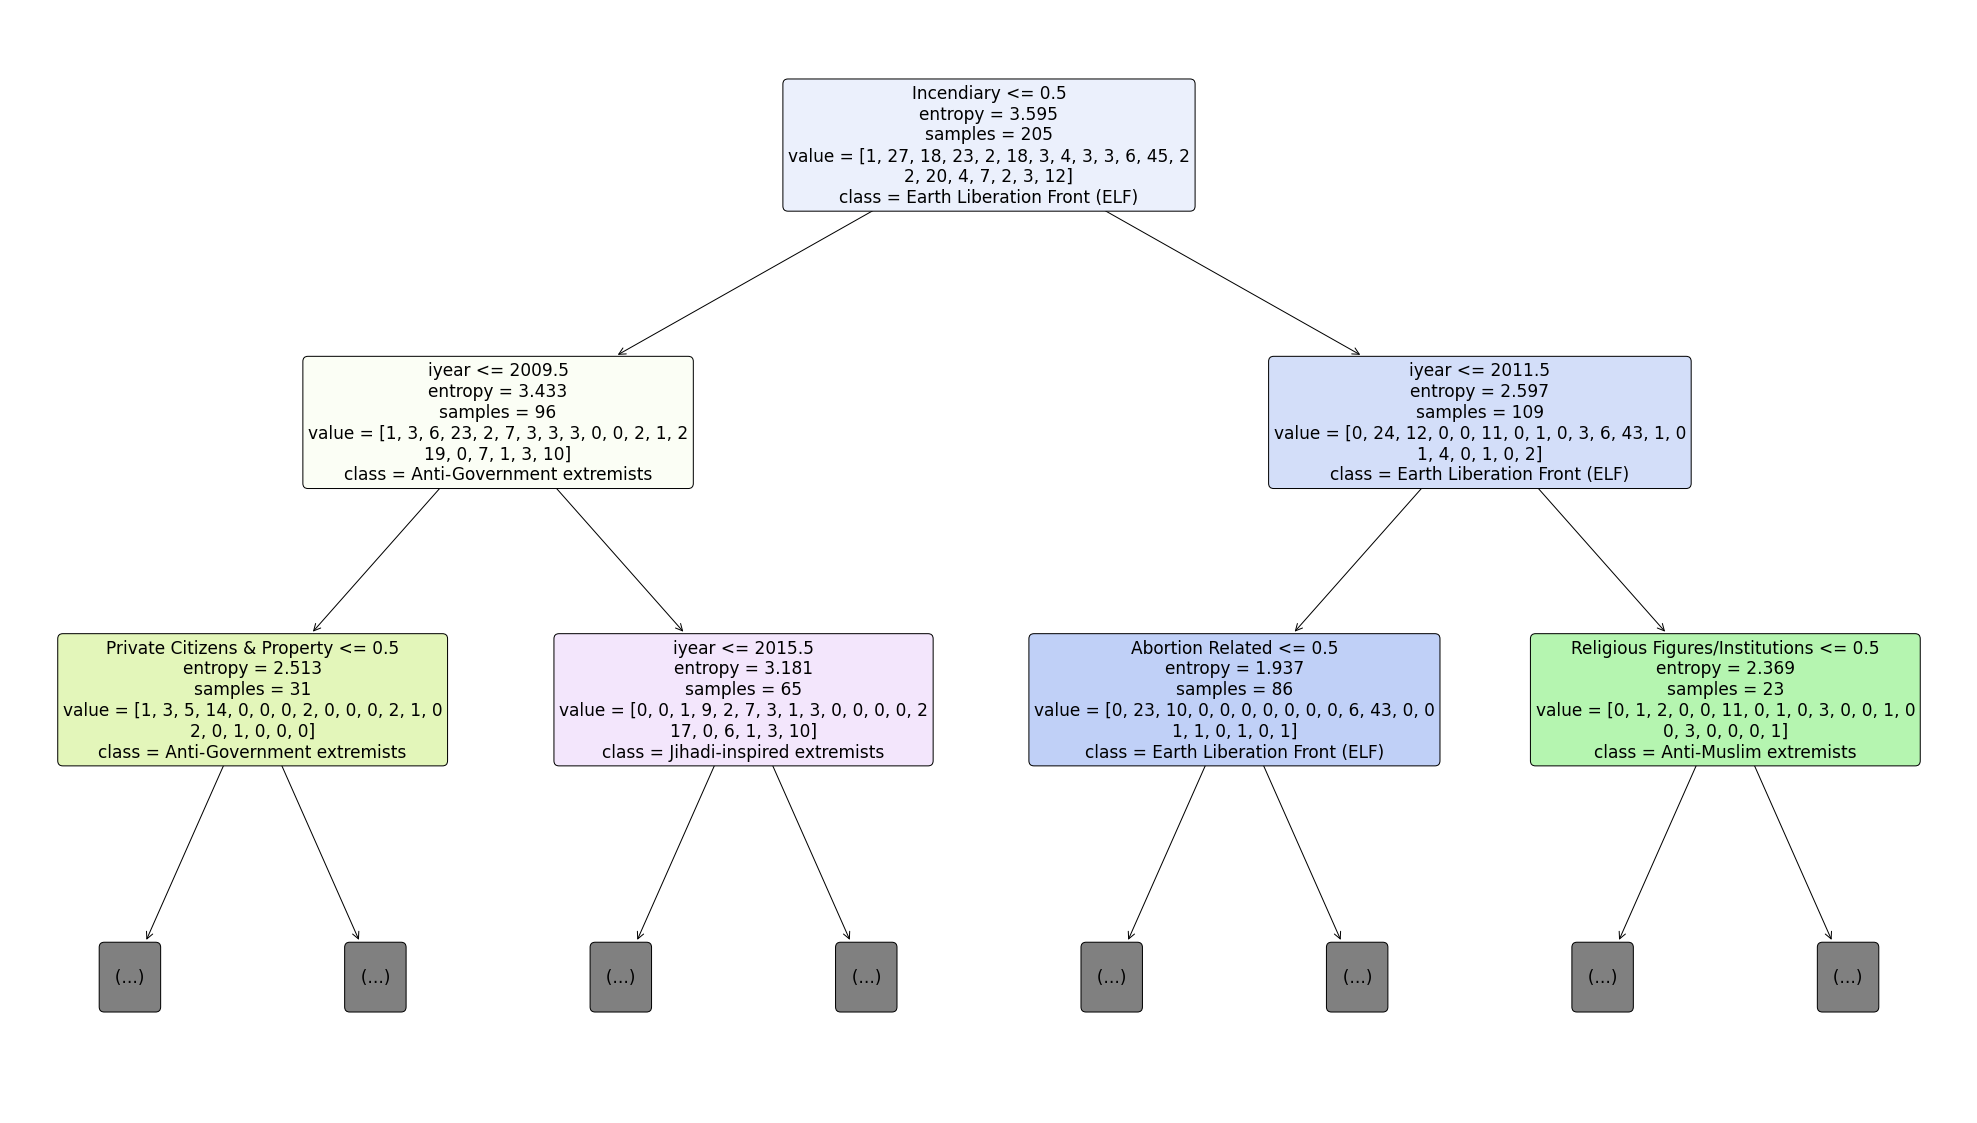

In [ ]:
from sklearn import tree

fig, ax = plt.subplots(figsize = (28,16))
plt.tight_layout()
tree.plot_tree(dtc, ax=ax, feature_names=features, class_names = classes, 
               max_depth = 2, filled=True, fontsize=17, rounded=True);

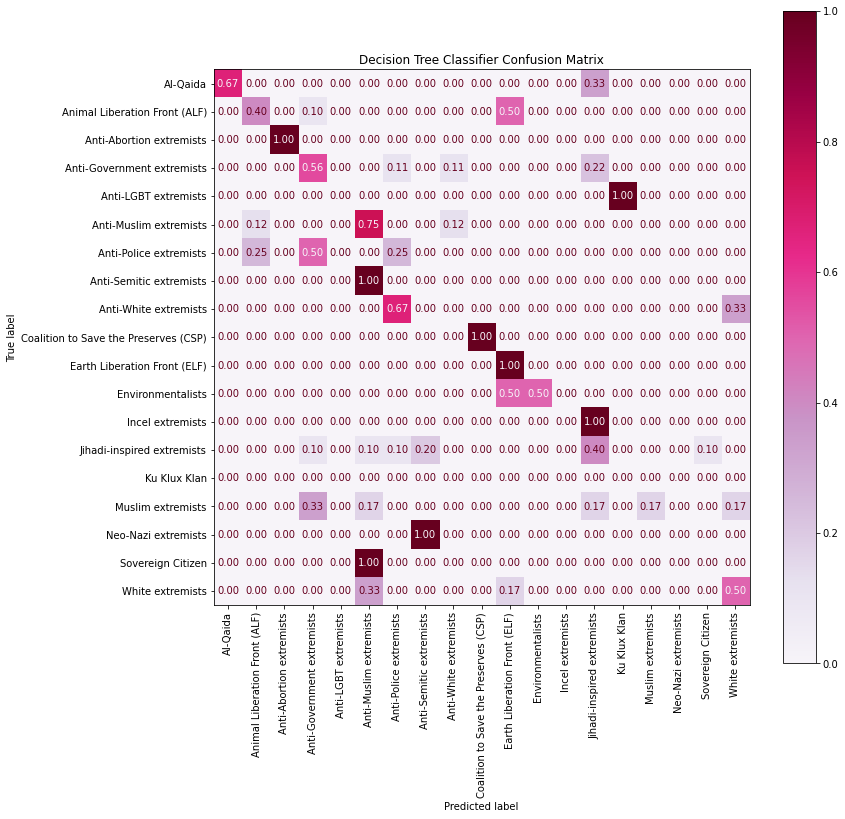

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))

matrix = plot_confusion_matrix(dtc, x_test, y_test, ax=ax, xticks_rotation='vertical',
                               cmap='PuRd', normalize='true', values_format='.2f')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()

In [ ]:
dtc_acc=print("Accuracy on Test set using Decision Trees: {:.4%}".format(dtc.score(x_test,y_test)))
dtc_rt=print('Runtime of the Decision Tree Classifier Algorithm: {:.4f}s'.format(dtc_run_time))

Accuracy on Test set using Decision Trees: 53.4091%
Runtime of the Decision Tree Classifier Algorithm: 0.0085s


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
start_time = time.time()

nb = GaussianNB()
nb.fit(x_train, y_train)

print("Accuracy on Train set ==> ", nb.score(x_train,y_train))
print("Accuracy on Test set ==> ", nb.score(x_test,y_test))

end_time = time.time()
nb_run_time = end_time - start_time

print('Runtime of the Naive Bayes Algorithm: {:.5f}s'.format(nb_run_time))

Accuracy on Train set ==>  0.7268292682926829
Accuracy on Test set ==>  0.375
Runtime of the Naive Bayes Algorithm: 0.01637s


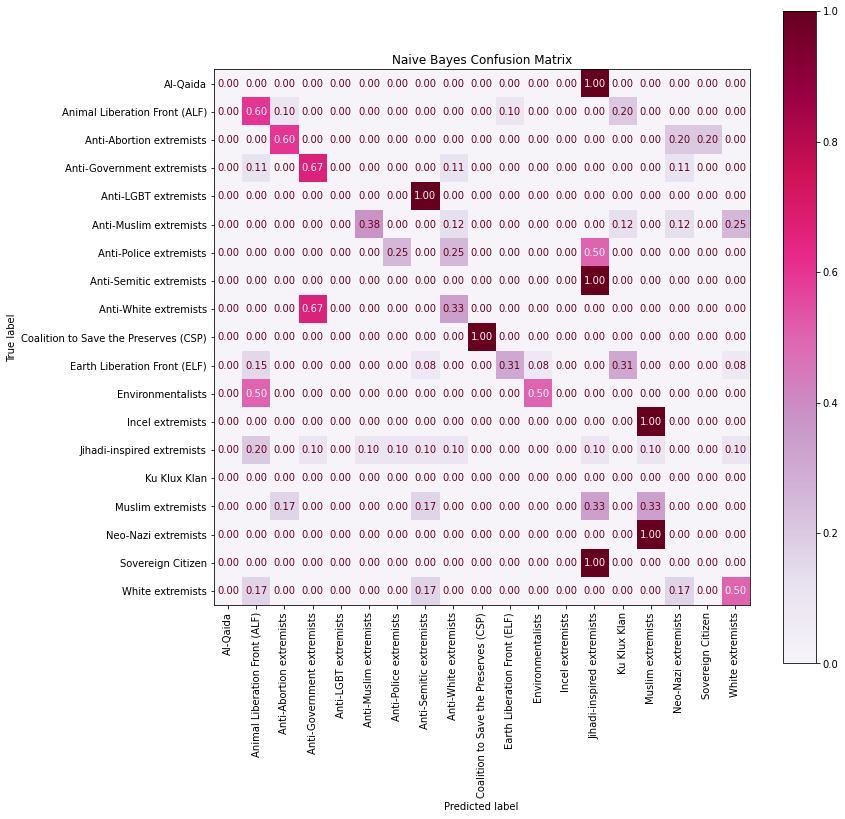

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))

matrix = plot_confusion_matrix(nb, x_test, y_test, ax=ax, xticks_rotation='vertical', 
                               cmap='PuRd', normalize='true', values_format='.2f')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [ ]:
nb_acc=print("Accuracy on Test set using Naive Bayes: {:.4%}".format(nb.score(x_test,y_test)))
nb_rt=print('Runtime of the Naive Bayes Algorithm: {:.4f}s'.format(nb_run_time)) 

Accuracy on Test set using Naive Bayes: 37.5000%
Runtime of the Naive Bayes Algorithm: 0.0164s


# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(40,40,40), max_iter=300, random_state=42)
mlp.fit(x_train_std, y_train)

print("Accuracy on Train set ==> ", mlp.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", mlp.score(x_test_std,y_test))

end_time = time.time()
mlp_run_time = end_time - start_time

print('Runtime of the Neural Network: {:.5f}s'.format(mlp_run_time))

Accuracy on Train set ==>  0.9170731707317074
Accuracy on Test set ==>  0.5
Runtime of the Neural Network: 2.47509s


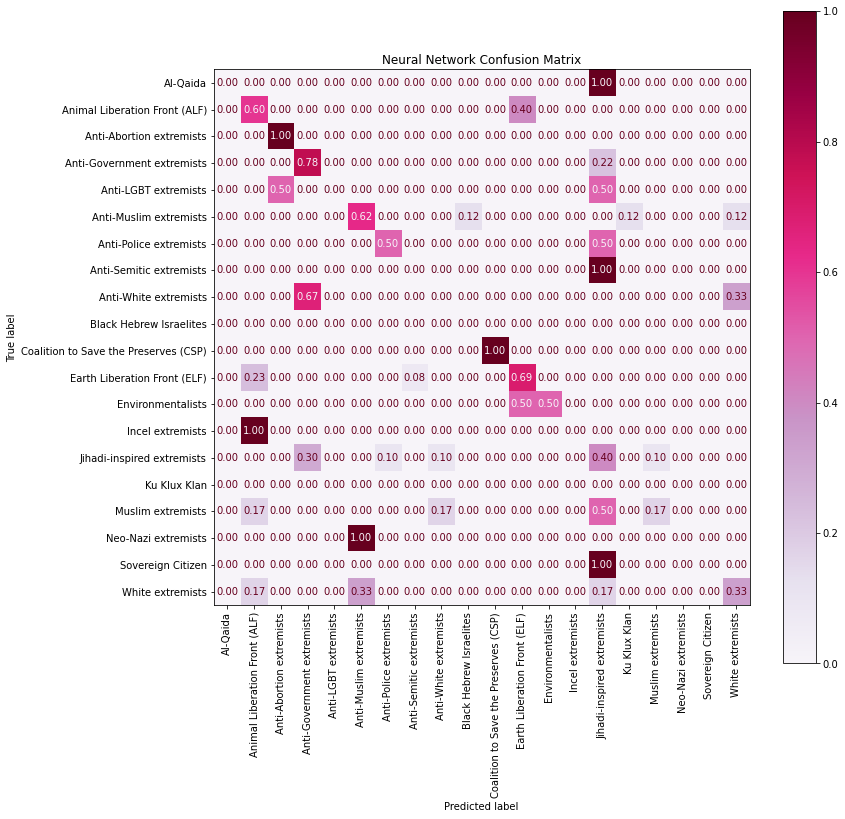

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))

matrix = plot_confusion_matrix(mlp, x_test_std, y_test, ax=ax, xticks_rotation='vertical',
                               cmap='PuRd', normalize='true', values_format='.2f')
plt.title('Neural Network Confusion Matrix')
plt.show()

In [ ]:
nn_acc=print("Accuracy on Test set using Neural Network: {:.4%}".format(mlp.score(x_test_std,y_test)))
nn_rt=print('Runtime of the Neural Network: {:.4f}s'.format(mlp_run_time))

Accuracy on Test set using Neural Network: 50.0000%
Runtime of the Neural Network: 2.4751s


k-means

In [ ]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.preprocessing import scale, robust_scale

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('coolwarm')
sns.set_color_codes('bright')

In [ ]:
data = pd.read_csv('terrorism_dataset.csv', encoding='latin1')

In [ ]:
data = data[data['nkill'] <= 4].reset_index(drop=True)
data = data[data['nwound'] <= 7].reset_index(drop=True)

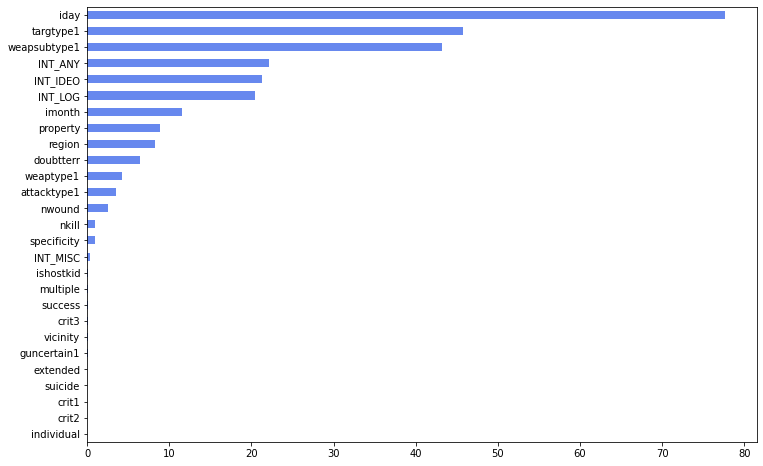

In [ ]:
c = data.count().sort_values().drop([
    'eventid', 'country', 'iyear', 'natlty1', 'longitude', 'latitude', 'targsubtype1'])
_ = data[c[c > 100000].keys()].var().sort_values().plot.barh()

In [ ]:
features = [
    'longitude',
    'latitude',
    
    'nwound',
    'nkill',
    
    'natlty1_txt',
    'targtype1_txt',
    'targsubtype1_txt',
    'weaptype1_txt',
    'attacktype1_txt',
]

X = pd.get_dummies(data[features])
X = X.T[X.var() > 0.05].T.fillna(0)
X = X.fillna(0)

print('Shape:', X.shape)
X.head()

Shape: (139435, 24)


,longitude,latitude,nwound,nkill,natlty1_txt_Afghanistan,natlty1_txt_India,natlty1_txt_Iraq,natlty1_txt_Pakistan,targtype1_txt_Business,targtype1_txt_Government (General),...,targsubtype1_txt_Unnamed Civilian/Unspecified,weaptype1_txt_Explosives,weaptype1_txt_Firearms,weaptype1_txt_Incendiary,weaptype1_txt_Unknown,attacktype1_txt_Armed Assault,attacktype1_txt_Assassination,attacktype1_txt_Bombing/Explosion,attacktype1_txt_Facility/Infrastructure Attack,attacktype1_txt_Hostage Taking (Kidnapping)
0,-69.951164,18.456792,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-99.086624,19.371887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,120.599741,15.478598,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-89.176269,37.005105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-56.187214,-34.891151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


2, 3, 4, 5, 6, 7, 8, 9, 10, 

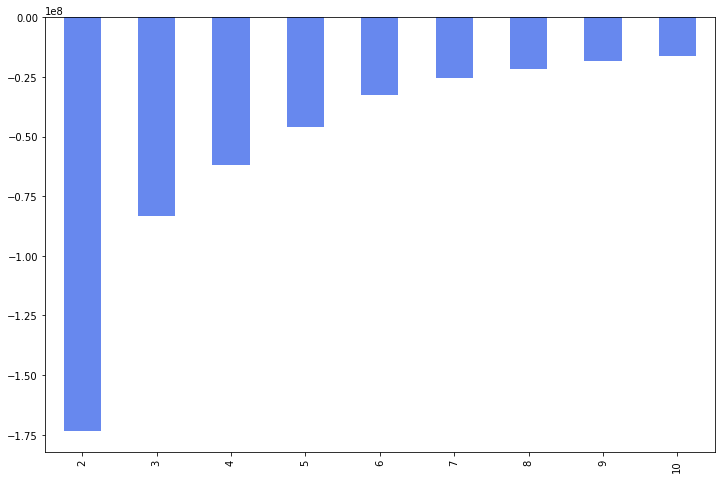

In [ ]:
scores = {}
for k in range(2, 11):
    print(k, end=', ')
    scores[k] = KMeans(n_clusters=k).fit(X).score(X)
_ = pd.Series(scores).plot.bar()

In [ ]:
data['Cluster'] = KMeans(n_clusters=6).fit_predict(X) + 1
print('Silhouette Score:', silhouette_score(X, data['Cluster'], sample_size=10000) * 10000 // 1 / 100, '%')

Silhouette Score: 58.5 %


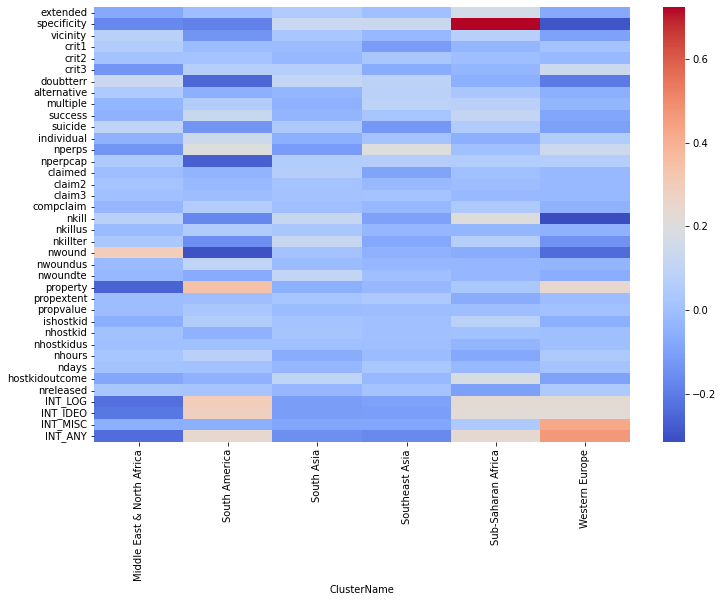

In [ ]:
names = data.groupby('Cluster')['region_txt'].describe()['top'].values
data['ClusterName'] = data['Cluster'].apply(lambda c: names[c - 1])

numerical = data.dtypes[data.dtypes != 'object'].keys()
exclude = [
    'eventid', 'Cluster', 'region', 'country', 'iyear', 
    'natlty1', 'natlty2', 'natlty3', 'imonth', 'iday',
    'guncertain1', 'guncertain2', 'guncertain3'
] + [col for col in numerical if 'type' in col or 'mode' in col or 'ransom' in col]
X_profiling = data[numerical.drop(exclude)].fillna(0)
X_profiling = pd.DataFrame(scale(X_profiling), columns=X_profiling.columns)
X_profiling['ClusterName'] = data['ClusterName']
_ = sns.heatmap(X_profiling.groupby('ClusterName').mean().drop(['longitude', 'latitude'], axis=1).T, 
               cmap='coolwarm')

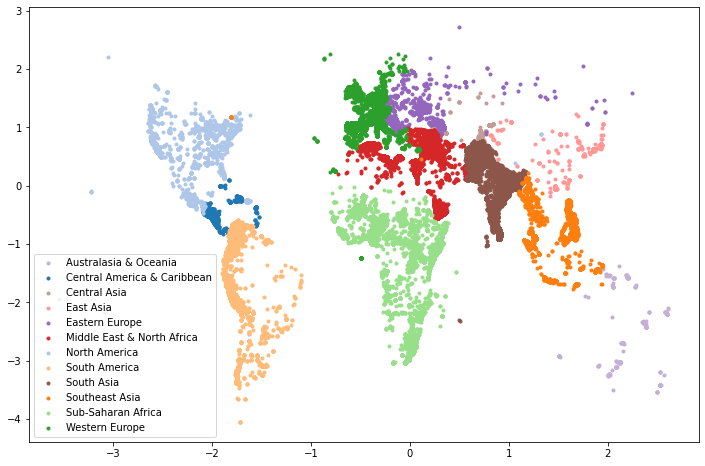

In [ ]:
ckeys = data['region_txt'].unique()
ckeys = dict(zip(ckeys, plt.cm.tab20(range(len(ckeys)))))

for i, x in pd.concat([X_profiling, data['region_txt']], axis=1).groupby('region_txt'):
    _ = plt.scatter(x['longitude'], x['latitude'], c=ckeys[i], marker='.', cmap='tab10', label=i)
_ = plt.legend(loc=3)

In [ ]:
kmeans_acc=print('Accuracy of the model:', 
      len(data[data['region_txt'] == data['ClusterName']]) / len(data) * 10000 // 1 / 100, '%')

Accuracy of the model: 83.87 %


In [ ]:
end_time = time.time()
scores_run_time = end_time - start_time

kmeans_rt=print('Runtime of the KMeans Algorithm: {:.5f}s'.format(scores_run_time))

Runtime of the KMeans Algorithm: 123.74400s


XGBOOST

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
obj_df = (pd.read_csv('/content/preprocessed_data.csv')
        .replace({'?': 'unknown'}))  
obj_df.drop(obj_df.columns[obj_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
X = obj_df.drop(columns='provstate')
y = obj_df['provstate'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
class MultiColumnLabelEncoder:
    
    def __init__(self, columns = None):
        self.columns = columns 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [ ]:
le = MultiColumnLabelEncoder()
X_train_le = le.fit_transform(X_train)
X_train_le.head()

,id,city,latitude,longitude,doubtterr,success,attacktype1_txt,targtype1_txt,natlty1_txt,gname,...,nkillter,nwound,nwoundus,nwoundte,propvalue,INT_IDEO,INT_MISC,president_party,state_governor_party,date
2004,992,109,421,265,1,1,5,2,41,31,...,0,0,0,0,29,0,0,0,5,786
136,78,344,547,153,1,1,3,3,41,149,...,0,0,0,0,100,2,0,1,5,52
628,303,239,153,113,0,1,2,2,41,43,...,3,0,0,2,19,0,0,1,1,213
334,168,374,91,154,2,1,2,2,41,175,...,3,0,18,2,16,2,0,1,1,105
2510,1251,366,381,471,0,1,3,14,41,20,...,0,1,1,0,114,2,0,0,5,1013


In [ ]:
le = MultiColumnLabelEncoder()
X_test_le = le.fit_transform(X_test)
X_test_le.head()

,id,city,latitude,longitude,doubtterr,success,attacktype1_txt,targtype1_txt,natlty1_txt,gname,...,nkillter,nwound,nwoundus,nwoundte,propvalue,INT_IDEO,INT_MISC,president_party,state_governor_party,date
365,182,336,308,453,0,1,3,6,38,91,...,0,0,0,0,104,2,0,1,0,114
393,196,154,58,387,0,1,3,3,38,143,...,0,0,0,0,20,2,0,1,2,124
1293,650,31,16,542,0,0,2,9,38,67,...,0,0,0,0,104,0,0,0,5,464
1350,673,229,367,471,1,1,0,2,38,98,...,0,0,0,0,70,0,0,0,0,481
2102,1053,92,45,376,0,1,3,0,38,10,...,0,0,0,0,9,2,0,0,0,811


In [ ]:
X_train_le.dtypes

id                      int64
city                    int64
latitude                int64
longitude               int64
doubtterr               int64
success                 int64
attacktype1_txt         int64
targtype1_txt           int64
natlty1_txt             int64
gname                   int64
nperps                  int64
nperpcap                int64
claimed                 int64
claimmode_txt           int64
weaptype1_txt           int64
nkill                   int64
nkillus                 int64
nkillter                int64
nwound                  int64
nwoundus                int64
nwoundte                int64
propvalue               int64
INT_IDEO                int64
INT_MISC                int64
president_party         int64
state_governor_party    int64
date                    int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_train_le

array([15, 47,  4, ..., 32, 39, 32])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_le = le.fit_transform(y_test)
y_test_le

array([18,  8, 37, ...,  3,  3,  3])

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train_le, y_train_le)

XGBClassifier(objective='multi:softprob')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test_le)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train_le, y = y_train_le, cv = 10)
xgb_acc=print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.52 %
Standard Deviation: 2.25 %


In [ ]:
end_time = time.time()
classifier_run_time = end_time - start_time

xgb_rt=print('Runtime of the XGBoost Algorithm: {:.5f}s'.format(classifier_run_time))

Runtime of the XGBoost Algorithm: 357.52298s
